### Don't think of simple moving averages as a forecasting method - we will look into more sophisticated methods later

### Notes:
- Basic SMA has some weaknesses:
    - Smaller windows will lead to more noise rather than signal
    - It will always lag by the size of the window
    - It will never reach the full peak or valley of the data due to the averaging
    - Doesn't really inform you about possible future behavior, all it really does is describe trends in your data
- To fix some of the SMA issues we can use EWMA (Exponentially Weighted Moving Averages)
    - Reduce the lag effect from SMA and it will put more weight on the values that occured more recently (by applying weight to the more recent values)
    - The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size

# SMA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
airline = pd.read_csv(r'./airline_passengers.csv', index_col="Month")
airline.dropna(inplace=True)
airline.index = pd.to_datetime(airline.index)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [11]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [13]:
airline.head(15)

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


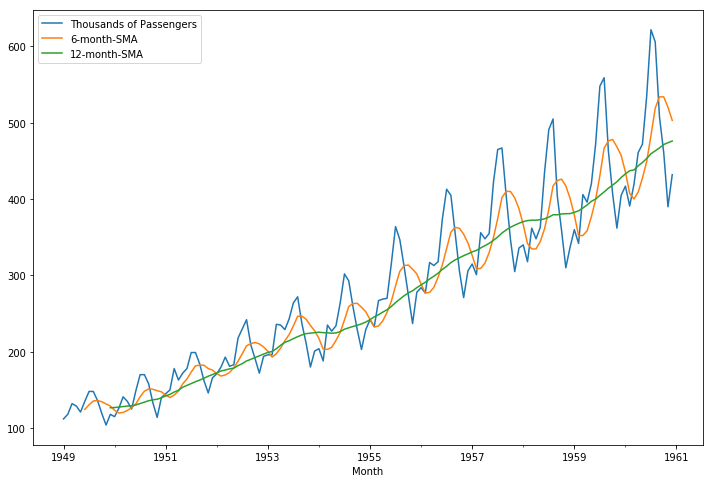

In [15]:
airline.plot(figsize=(12,8))

# EWMA

### Note: There are many parameters with the .ewm() function - for more details see official course notes

In [16]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()

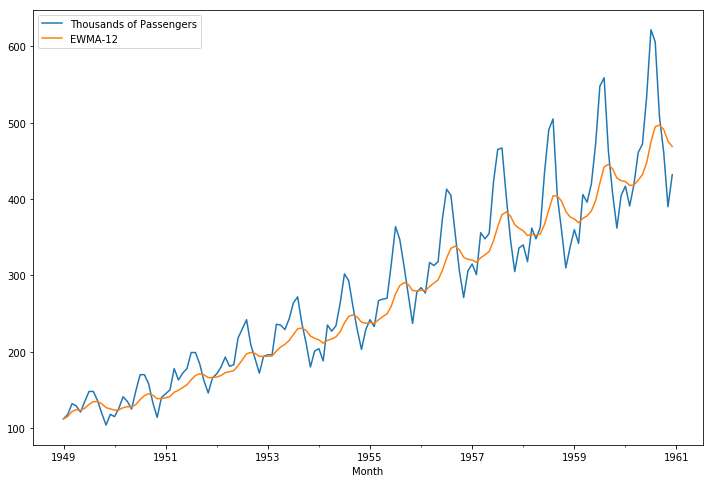

In [17]:
airline[['Thousands of Passengers', 'EWMA-12']].plot(figsize=(12,8))